# Topic 1 Overview of Machine Learning and Tensorflow

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())

tf.test.gpu_device_name()

Version:  2.2.0
Eager mode:  True


'/device:GPU:0'

# Topic 2 Basic Tensorflow Operations

## Tensor and Constant

In [ ]:
a = tf.constant(4,dtype=tf.float32)
b = tf.constant(5.6,dtype=tf.float32)
c = a*b
print(c)

In [ ]:
c.numpy()

In [ ]:
a = tf.constant(4)
b = tf.constant(5.6)
print(a*b)

In [ ]:
a = tf.constant([1,5])

## Matrix

In [ ]:
a = tf.constant([[1,2],[3,4]])
b = tf.constant([[5,6],[7,8]])
c = tf.matmul(a,b)
print(c)

In [ ]:
c.numpy()

## Exercise: Matrix

In [ ]:
x = tf.constant([[1.1,1.2]],dtype=tf.float32)
w = tf.constant([[1,2],[3,4]],dtype=tf.float32)
b = tf.constant([[2.3,2.5]],dtype=tf.float32)
y = tf.matmul(x,w)+b


## Variable

In [ ]:
x = tf.Variable(0)
x = tf.Variable(tf.zeros((2,2)))

## Graph Mode

In [ ]:
W = tf.Variable(tf.ones((2,2)),dtype=tf.float32)
b = tf.Variable(tf.zeros((1,2)),dtype=tf.float32)

@tf.function
def nn(x):
  y = tf.matmul(x,W)+b
  return tf.nn.relu(y)


In [ ]:
x = tf.constant([[1,0]],dtype=tf.float32)
y = nn(x)
y.numpy()

## Gradient

In [ ]:
x = tf.Variable(2.0)

@tf.function
def f(x):
  return x*x*x

In [ ]:
with tf.GradientTape() as g:  
 y = f(x)
dy_dx = g.gradient(y,x)
dy_dx.numpy()

# Topic 3 Datasets

## MNIST dataset

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
x_train.shape, y_train.shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

#### One Hot Encoding

In [ ]:
from keras.utils import to_categorical
y_train,y_test = to_categorical(y_train), to_categorical(y_test)

In [ ]:
y_train[:10]

In [ ]:
y_train.shape

## Fashion MNIST dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
x_train.shape, y_train.shape

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## CIFAR dataset

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
x_train.shape, y_train.shape

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

## IMDB Dataset

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 20000
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

# Topic 4 Neural Networks for Regression

### Prepare the data

In [ ]:
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"                     
dataset = pd.read_csv(dataset_path)
dataset

In [ ]:
dataset = dataset.dropna()

In [ ]:
x_train = dataset.sample(frac=0.7,random_state=0)
x_test = dataset.drop(x_train.index)

In [ ]:
y_train = x_train.pop('medv')
y_test = x_test.pop('medv')

In [ ]:
x_train = (x_train - x_train.mean())/(x_train.max()-x_train.min())
x_test = (x_test - x_test.mean())/(x_test.max()-x_test.min())

### Build the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=[len(x_train.keys())]))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(lr=0.001)
model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])

In [ ]:
model.summary()

In [ ]:
model = Sequential([
    Dense(64,activation='relu',input_shape=[len(x_train.keys())]),
    Dense(64,activation='relu'),
    Dense(1,activation='linear')
])

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(lr=0.001)
model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])

In [ ]:
model.summary()

### Visualize the Model

In [ ]:
keras.utils.plot_model(model, 'my_first_model.png')

In [ ]:
keras.utils.plot_model(model, 'model.png', show_shapes=True)

### Train the model

In [ ]:
EPOCHS = 100
history = model.fit(x_train, y_train,epochs=EPOCHS,shuffle=True, validation_data=(x_test,y_test))

### Evaluate the model

In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']
epoch = range(len(mae))

import matplotlib.pyplot as plt

plt.plot(epoch,mae,label='mae')
plt.plot(epoch,val_mae,label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error [MPG]')
plt.legend()
plt.show()

In [ ]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)
print("Testing Mean Abs Error: {:5.2f}".format(mae))

### Make Prediction

In [ ]:
y_hat = model.predict(x_test).flatten()

plt.scatter(y_test, y_hat)
plt.xlabel('True Values [Housing Price]')
plt.ylabel('Predictions [Housing Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([0, 100], [0, 100])




```
# This is formatted as code
```

### Save the Model in HDF5 Format

In [ ]:
model.save("regression.h5")

### Load the Model

In [ ]:
new_model = keras.models.load_model('regression.h5')
new_model.summary()

### Save the Model in SavedModel Format

In [ ]:
model.save("regression/1/")

In [ ]:
new_model = keras.models.load_model('regression/1/')
new_model.summary()

### Save and Load Weighta

In [ ]:
# Save the weights
model.save_weights('./regression/1/w')

# Restore the weights
model.load_weights('./regression/1/w)


### Exercise: Predictive Regression Model

In [ ]:
import pandas as pd
dataset_path = "https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv"
                     
dataset = pd.read_csv(dataset_path)
dataset

In [ ]:
dataset = dataset.dropna()
dataset.pop('Name')
dataset

In [ ]:
x_train = dataset.sample(frac=0.7,random_state=0)
x_test = dataset.drop(x_train.index)

In [ ]:
y_train = x_train.pop('SepalWidth')
y_test = x_test.pop('SepalWidth')

In [ ]:
x_train = (x_train - x_train.mean())/(x_train.max()-x_train.min())
x_test = (x_test - x_test.mean())/(x_test.max()-x_test.min())

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=[len(x_train.keys())]))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(lr=0.001)
model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])

In [ ]:
model.summary()

In [ ]:
EPOCHS = 100
history = model.fit(x_train, y_train,epochs=EPOCHS,shuffle=True, validation_data=(x_test,y_test))

In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']
epoch = range(len(mae))

import matplotlib.pyplot as plt

plt.plot(epoch,mae,label='mae')
plt.plot(epoch,val_mae,label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error [MPG]')
plt.legend()
plt.show()

In [ ]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)
print("Testing Mean Abs Error: {:5.2f}".format(mae))

In [ ]:
y_hat = model.predict(x_test).flatten()

plt.scatter(y_test, y_hat)
plt.xlabel('True Values [Sepal Width]')
plt.ylabel('Predictions [Sepal Width]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([0, 100], [0, 100])


In [ ]:
model.save("iris.h5")

# tf.saved_model.save(model, "/model_iris/1/")

In [ ]:
new_model = keras.models.load_model('iris.h5')

In [ ]:
new_model.summary()

# Topic 5 Neural Network for Classification

## NN Demo on MNIST dataset

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*acc))

In [ ]:
model.save("mnist.h5")

# tf.saved_model.save(model, "/model_mnist/1/")

In [ ]:
new_model =keras.models.load_model('mnist.h5')

In [ ]:
new_model.summary()

#### Sparse Cross Entropy vs Cross Entropy

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
from keras.utils import to_categorical
y_train,y_test = to_categorical(y_train), to_categorical(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

## Ex: Classification for Fashsion MNIST dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.figure()
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*acc))

In [ ]:
# model.save("classifcation_model_fashion_mnist.h5")

tf.saved_model.save(model, "/model_fashion_mnist/1/")

# Topic 6 Convolutional Neural Network (CNN)

## CNN on MNIST dataset

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [ ]:
# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [ ]:
x_train.shape

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28, 28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test))

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*acc))

## Ex: CNN on CIFAR dataset

### Import and Normalize data

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
train_images.shape

### Build the Model

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [ ]:
model.summary()

### Train the Model

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test))

### Evaluate the Model

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*acc))

## CNN on Small Dataset: Cats and Dogs

### Import the data

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [15]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
PATH

'/root/.keras/datasets/cats_and_dogs_filtered'

In [16]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [17]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [18]:
print(train_cats_dir)
print(train_dogs_dir)
print(validation_cats_dir)
print(validation_dogs_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [19]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [20]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

### ImageDataGenerator

In [21]:
train_image_generator = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 

In [22]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Visualize the raw images 

In [23]:
sample_training_images, _ = next(train_data_gen)

In [24]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

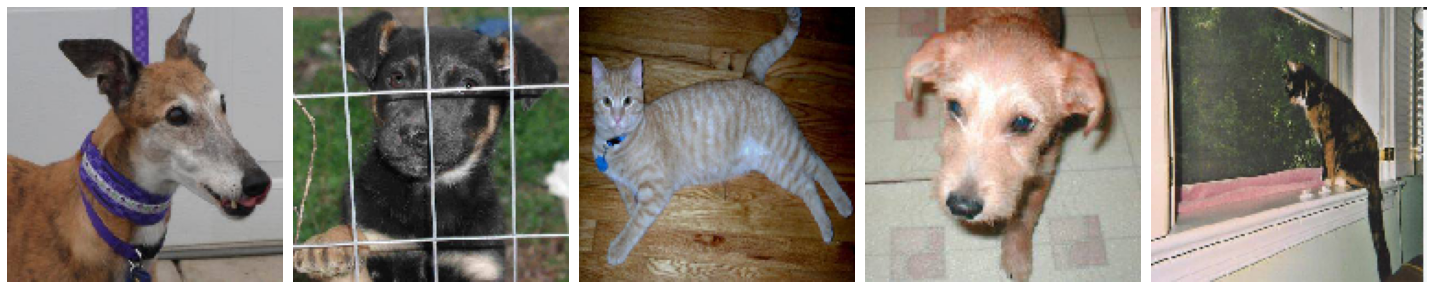

In [25]:
plotImages(sample_training_images[:5])

### Build the Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

### Train the Model

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_original = model.fit(train_data_gen,epochs=epochs,validation_data=val_data_gen)

Epoch 1/15
16/16 [==============================] - 11s 711ms/step - loss: 0.7321 - accuracy: 0.4930 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 2/15
16/16 [==============================] - 10s 624ms/step - loss: 0.6925 - accuracy: 0.5065 - val_loss: 0.6883 - val_accuracy: 0.5000
Epoch 3/15
16/16 [==============================] - 10s 618ms/step - loss: 0.6864 - accuracy: 0.5490 - val_loss: 0.6807 - val_accuracy: 0.6360
Epoch 4/15
16/16 [==============================] - 10s 615ms/step - loss: 0.6605 - accuracy: 0.5950 - val_loss: 0.6359 - val_accuracy: 0.6330
Epoch 5/15
16/16 [==============================] - 10s 618ms/step - loss: 0.6319 - accuracy: 0.6205 - val_loss: 0.6370 - val_accuracy: 0.6310
Epoch 6/15
16/16 [==============================] - 10s 621ms/step - loss: 0.5984 - accuracy: 0.6750 - val_loss: 0.6438 - val_accuracy: 0.6520
Epoch 7/15
16/16 [==============================] - 10s 621ms/step - loss: 0.5750 - accuracy: 0.6940 - val_loss: 0.6354 - val_accuracy: 0.6680

### Evaluate the Model

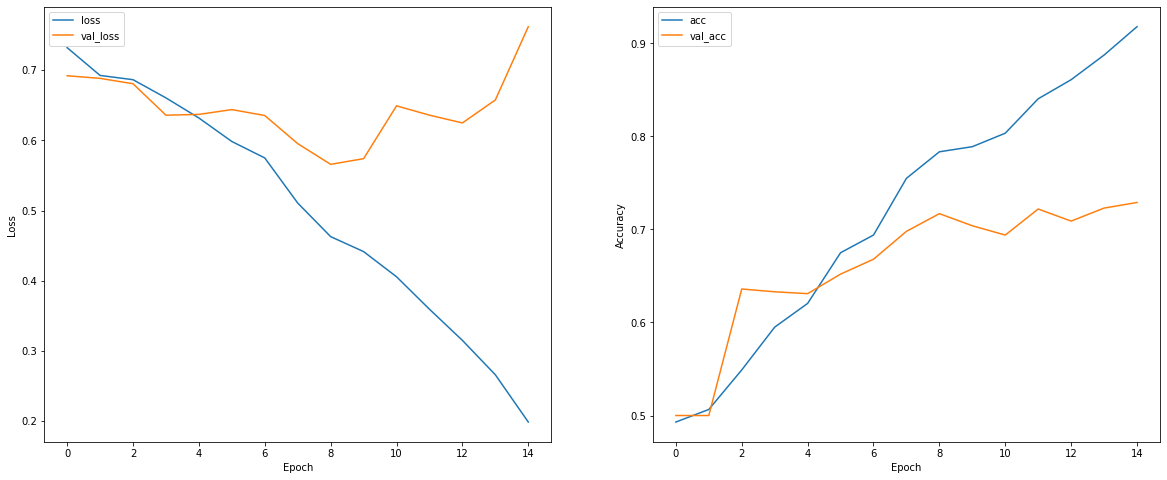

In [28]:
loss = history_original.history['loss']
val_loss = history_original.history['val_loss']
acc = history_original.history['accuracy']
val_acc = history_original.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [29]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [30]:
model.save('/content/drive/My Drive/dataset/cats_and_dogs_small.h5')

In [31]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/My Drive/dataset/cats_and_dogs_small.h5')
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       1

### Test the Model

In [32]:
from keras.preprocessing import image
import numpy as np

img_path = '/content/drive/My Drive/dataset/test_cat.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

Using TensorFlow backend.


(1, 150, 150, 3)


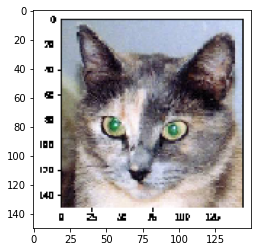

In [33]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [34]:
model.predict(img_tensor)

array([[0.00202163, 0.9979784 ]], dtype=float32)

In [35]:
img_path = '/content/drive/My Drive/dataset/test_dog.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 150, 150, 3)


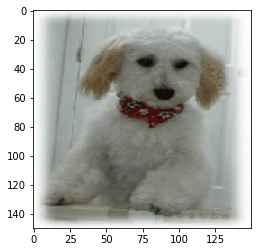

In [36]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [37]:
model.predict(img_tensor)

array([[0.21220823, 0.7877917 ]], dtype=float32)

### Dropout

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_dropout = model.fit(train_data_gen,epochs=epochs,validation_data=val_data_gen)

Epoch 1/15
16/16 [==============================] - 10s 638ms/step - loss: 0.7422 - accuracy: 0.4935 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 2/15
16/16 [==============================] - 10s 643ms/step - loss: 0.6896 - accuracy: 0.5255 - val_loss: 0.6900 - val_accuracy: 0.5040
Epoch 3/15
16/16 [==============================] - 10s 636ms/step - loss: 0.6804 - accuracy: 0.5575 - val_loss: 0.6481 - val_accuracy: 0.6470
Epoch 4/15
16/16 [==============================] - 10s 640ms/step - loss: 0.6520 - accuracy: 0.6130 - val_loss: 0.6331 - val_accuracy: 0.6320
Epoch 5/15
16/16 [==============================] - 10s 641ms/step - loss: 0.6141 - accuracy: 0.6705 - val_loss: 0.6158 - val_accuracy: 0.6550
Epoch 6/15
16/16 [==============================] - 10s 648ms/step - loss: 0.5955 - accuracy: 0.6755 - val_loss: 0.5754 - val_accuracy: 0.7050
Epoch 7/15
16/16 [==============================] - 10s 636ms/step - loss: 0.5479 - accuracy: 0.7255 - val_loss: 0.5355 - val_accuracy: 0.7320

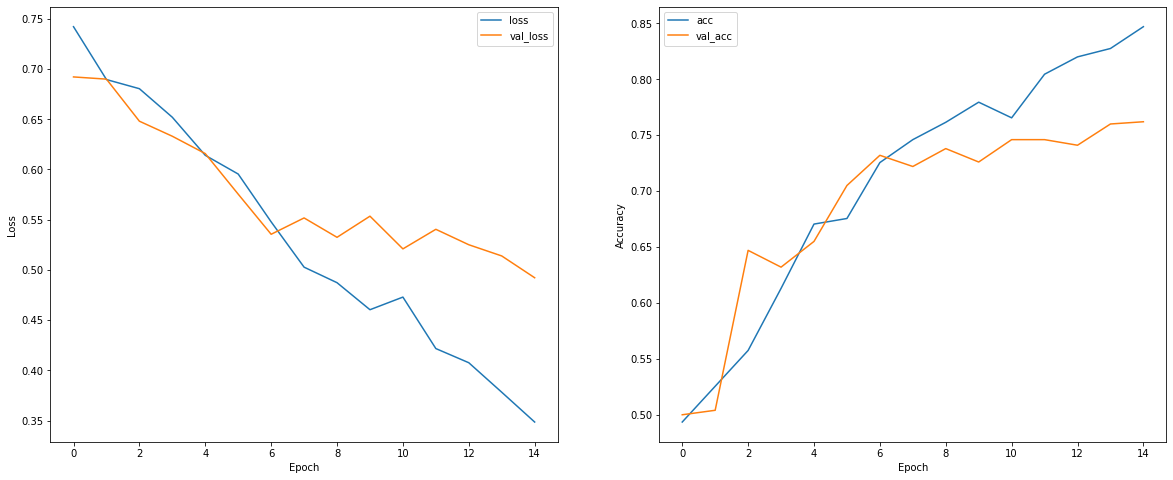

In [40]:
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']
acc = history_dropout.history['accuracy']
val_acc = history_dropout.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Applying Data Augumentation

In [41]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
image_gen_val = ImageDataGenerator(rescale=1./255)

In [42]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


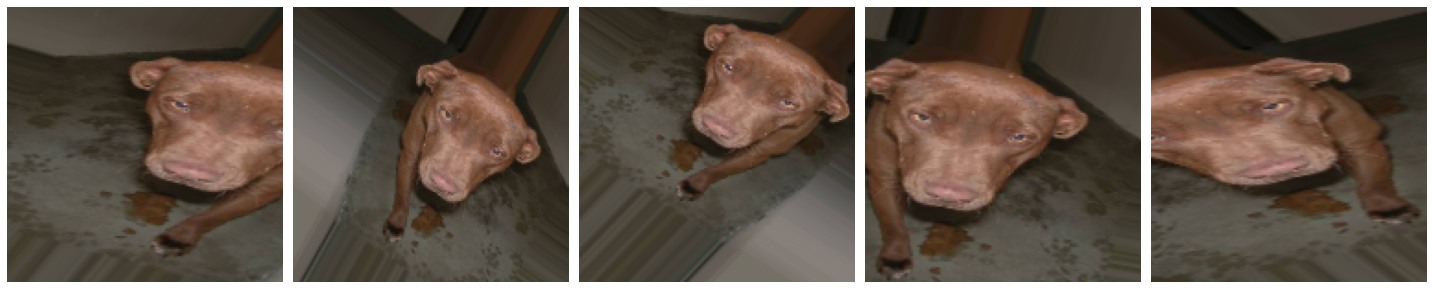

In [43]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Build the Model

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

### Train the Model

In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_augmentation = model.fit(train_data_gen,epochs=epochs,validation_data=val_data_gen)

Epoch 1/15
16/16 [==============================] - 19s 1s/step - loss: 0.7662 - accuracy: 0.4865 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 2/15
16/16 [==============================] - 19s 1s/step - loss: 0.6829 - accuracy: 0.5270 - val_loss: 0.6657 - val_accuracy: 0.5770
Epoch 3/15
16/16 [==============================] - 19s 1s/step - loss: 0.6685 - accuracy: 0.5795 - val_loss: 0.6483 - val_accuracy: 0.6000
Epoch 4/15
16/16 [==============================] - 19s 1s/step - loss: 0.6780 - accuracy: 0.5650 - val_loss: 0.6814 - val_accuracy: 0.5270
Epoch 5/15
16/16 [==============================] - 19s 1s/step - loss: 0.6691 - accuracy: 0.5895 - val_loss: 0.6534 - val_accuracy: 0.6480
Epoch 6/15
16/16 [==============================] - 19s 1s/step - loss: 0.6477 - accuracy: 0.6325 - val_loss: 0.6345 - val_accuracy: 0.6400
Epoch 7/15
16/16 [==============================] - 19s 1s/step - loss: 0.6262 - accuracy: 0.6550 - val_loss: 0.6047 - val_accuracy: 0.6700
Epoch 8/15
16/16 [==

### Evalaute the Model

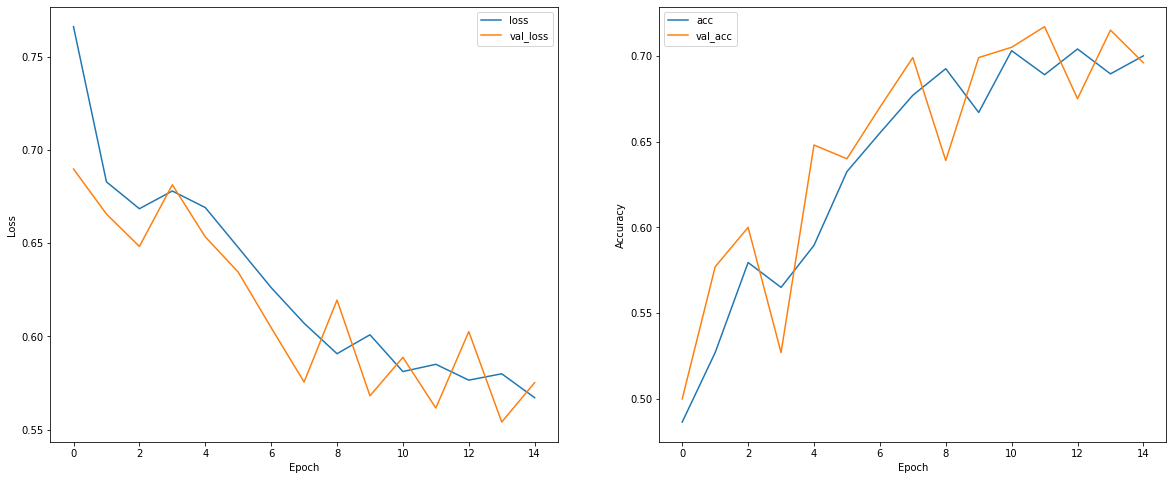

In [52]:
loss = history_augmentation.history['loss']
val_loss = history_augmentation.history['val_loss']
acc = history_augmentation.history['accuracy']
val_acc = history_augmentation.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Ex: Data Augmentation

In [53]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train.shape, x_test.shape

170500096/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [55]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    zoom_range=0.5
                    )
image_gen_val = ImageDataGenerator(rescale=1./255)

In [58]:
BATCH_SIZE = 100
train_data_gen = image_gen_train.flow(x_train,y_train, batch_size=BATCH_SIZE)
val_data_gen = image_gen_val.flow(x_test,y_test, batch_size=BATCH_SIZE)

In [59]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_data_gen, epochs=15,validation_data=val_data_gen)

Epoch 1/10
500/500 [==============================] - 36s 72ms/step - loss: 2.3028 - accuracy: 0.0399 - val_loss: 2.3026 - val_accuracy: 0.0000e+00
Epoch 2/10
500/500 [==============================] - 36s 72ms/step - loss: 2.3027 - accuracy: 0.1340 - val_loss: 2.3026 - val_accuracy: 1.0000
Epoch 3/10
500/500 [==============================] - 36s 72ms/step - loss: 2.3027 - accuracy: 0.3480 - val_loss: 2.3026 - val_accuracy: 0.0000e+00
Epoch 4/10
500/500 [==============================] - 36s 72ms/step - loss: 2.3027 - accuracy: 0.0000e+00 - val_loss: 2.3026 - val_accuracy: 0.0000e+00
Epoch 5/10
500/500 [==============================] - 36s 72ms/step - loss: 2.3027 - accuracy: 0.0000e+00 - val_loss: 2.3026 - val_accuracy: 0.0000e+00
Epoch 6/10
500/500 [==============================] - 36s 71ms/step - loss: 2.3027 - accuracy: 0.0000e+00 - val_loss: 2.3026 - val_accuracy: 0.0000e+00
Epoch 7/10
500/500 [==============================] - 36s 71ms/step - loss: 2.3027 - accuracy: 0.1540 - 

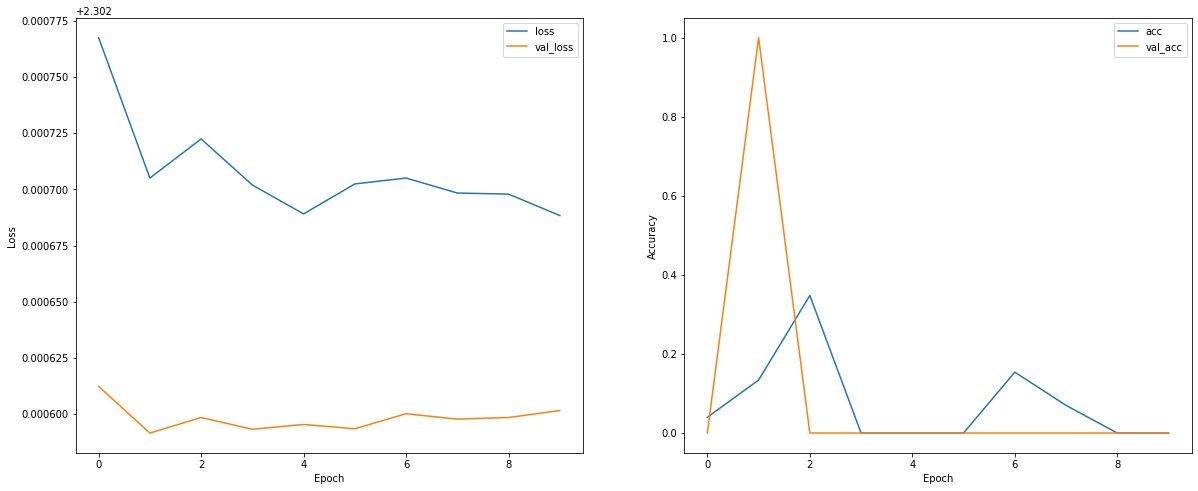

In [62]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Topic 7 Transfer Learning

## Fine Tuning and Feature Extraction

In [63]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow. keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [64]:
base_model=MobileNet(weights='imagenet',include_top=False, input_shape=(150, 150, 3)) 

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x) 
preds=Dense(2,activation='softmax')(x) 

model=Model(inputs=base_model.input,outputs=preds)

17227776/17225924 [==============================] - 0s 0us/step


In [65]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 151, 151, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 75, 75, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 75, 75, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 75, 75, 32)        128   

### Feature Extraction

In [61]:
# base_model.trainable = False

### Fine Tunning

In [66]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [67]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [68]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
PATH

'/root/.keras/datasets/cats_and_dogs_filtered'

In [69]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [70]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [71]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [72]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [73]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
image_gen_val = ImageDataGenerator(rescale=1./255)

In [74]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [75]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_augmentation = model.fit(train_data_gen,epochs=epochs,validation_data=val_data_gen)

Epoch 1/15
16/16 [==============================] - 21s 1s/step - loss: 1.1106 - accuracy: 0.7000 - val_loss: 0.8856 - val_accuracy: 0.8380
Epoch 2/15
16/16 [==============================] - 20s 1s/step - loss: 0.2421 - accuracy: 0.9010 - val_loss: 0.3924 - val_accuracy: 0.8910
Epoch 3/15
16/16 [==============================] - 20s 1s/step - loss: 0.1874 - accuracy: 0.9240 - val_loss: 0.1699 - val_accuracy: 0.9570
Epoch 4/15
16/16 [==============================] - 20s 1s/step - loss: 0.1644 - accuracy: 0.9325 - val_loss: 0.3235 - val_accuracy: 0.9370
Epoch 5/15
16/16 [==============================] - 20s 1s/step - loss: 0.1529 - accuracy: 0.9395 - val_loss: 0.2278 - val_accuracy: 0.9480
Epoch 6/15
16/16 [==============================] - 21s 1s/step - loss: 0.1353 - accuracy: 0.9465 - val_loss: 0.1809 - val_accuracy: 0.9540
Epoch 7/15
16/16 [==============================] - 20s 1s/step - loss: 0.1226 - accuracy: 0.9575 - val_loss: 0.1665 - val_accuracy: 0.9640
Epoch 8/15
16/16 [==

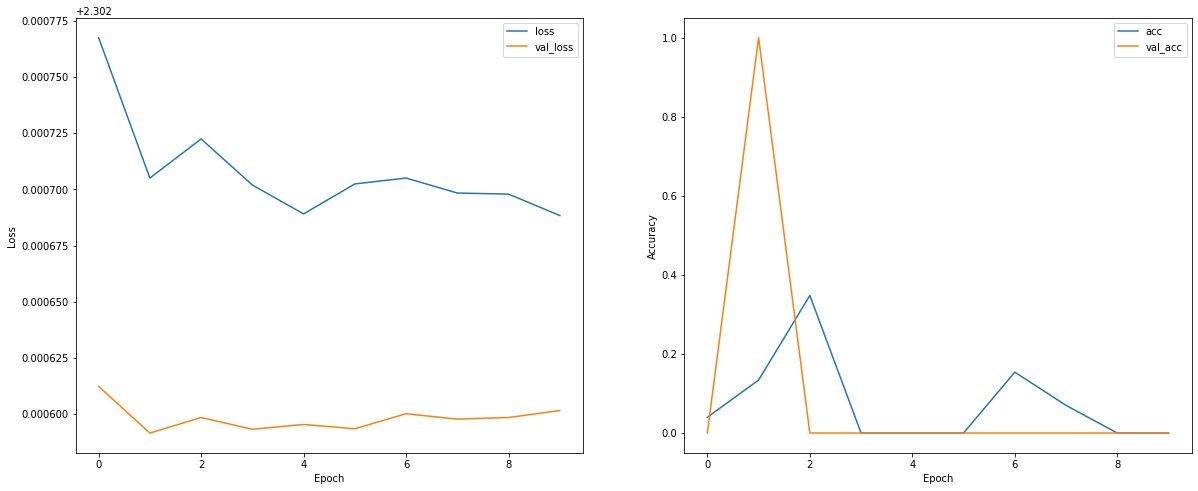

In [77]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Testing the Model

In [ ]:
from keras.preprocessing import image
import numpy as np

img_path = '/content/drive/My Drive/dataset/test_cat.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [ ]:
model.predict(img_tensor)

In [ ]:
img_path = '/content/drive/My Drive/dataset/test_dog.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [ ]:
model.predict(img_tensor)

## Tensorflow Hub

In [ ]:
import tensorflow_hub as hub

In [ ]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4" 

In [ ]:
classifier = tf.keras.Sequential([hub.KerasLayer(classifier_url, input_shape=(224,224,3))])

In [ ]:
import numpy as np
import PIL.Image as Image

img = tf.keras.utils.get_file('image.jpg','https://images.all-free-download.com/images/graphicthumb/dogs_dog_animal_215598.jpg')
img = Image.open(img).resize((224,224))
img

In [ ]:
img = np.array(img)/255.0
img.shape

In [ ]:
result = classifier.predict(img[np.newaxis, ...])

In [ ]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

In [ ]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [ ]:
plt.imshow(img)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

# Topic 8 Recurrent Neural Network (RNN)

## Sentiment Analysis With RNN

### Load the IMDB dataset

In [78]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('input_train shape:', x_train.shape)
print('input_test shape:', x_test.shape)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


### Build the Model

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow. keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

### Train the Model

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=15, batch_size=128,validation_data=(x_test,y_test))

Epoch 1/15
196/196 [==============================] - 22s 113ms/step - loss: 0.4845 - accuracy: 0.7752 - val_loss: 0.4020 - val_accuracy: 0.8326
Epoch 2/15
196/196 [==============================] - 22s 111ms/step - loss: 0.2789 - accuracy: 0.8902 - val_loss: 0.7618 - val_accuracy: 0.7432
Epoch 3/15
196/196 [==============================] - 22s 112ms/step - loss: 0.2285 - accuracy: 0.9139 - val_loss: 0.3123 - val_accuracy: 0.8680
Epoch 4/15
196/196 [==============================] - 22s 111ms/step - loss: 0.1970 - accuracy: 0.9272 - val_loss: 0.5013 - val_accuracy: 0.7978
Epoch 5/15
196/196 [==============================] - 22s 111ms/step - loss: 0.1775 - accuracy: 0.9341 - val_loss: 0.5295 - val_accuracy: 0.8113
Epoch 6/15
196/196 [==============================] - 22s 111ms/step - loss: 0.1627 - accuracy: 0.9405 - val_loss: 0.3617 - val_accuracy: 0.8726
Epoch 7/15
196/196 [==============================] - 22s 111ms/step - loss: 0.1493 - accuracy: 0.9473 - val_loss: 0.4809 - val_ac

### Evaluate the Model

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


### Add Dropout

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow. keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32,dropout=0.1,recurrent_dropout=0.1))
model.add(Dense(1, activation='sigmoid'))

NameError: ignored

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=15, batch_size=128,validation_data=(x_test,y_test))

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


## Time Series Prediction With RNN
- Stock prices are downloaded from finance.yahoo.com. Disneyland (DIS) Stock Price CSV file.
- Closed value (column[5]) is used in the network, LSTM Code
Values are normalized in range (0,1).
- Datasets are splitted into train and test sets, 50% test data, 50% training data.
Keras-Tensorflow is used for implementation.
- LSTM network consists of 25 hidden neurons, and 1 output layer (1 dense layer).
- LSTM network features input: 1 layer, output: 1 layer , hidden: 25 neurons, optimizer:adam, dropout:0.1, timestep:240, batchsize:240, epochs:1000 (features can be further optimized).
- Output files: lstm_results (consists of prediction and actual values), plot file (actual and prediction values).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
import time #helper libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

### Load the Data

In [ ]:
input_file="/content/drive/My Drive/dataset/DIS.csv"

# load the dataset
df = read_csv(input_file, header=None, index_col=None, delimiter=',')

In [ ]:
df

### Prepare the Data 

In [ ]:
# take close price column[5]
all_y = df[5].values
dataset=all_y.reshape(-1, 1)

In [ ]:
dataset

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets, 50% test data, 50% training data
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

### Reshape data for Training

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1, timestep 240
look_back = 240
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

### Build the RNN Model

In [ ]:
# create and fit the LSTM network, optimizer=adam, 25 neurons
model = Sequential()
model.add(LSTM(25, activation='relu',input_shape=(1, look_back)))
model.add(Dense(1,activation='linear'))

In [ ]:
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=240)

### Forecasting

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

### Plotting

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

In [ ]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)

# plot the actual price, prediction in test data=red line, actual price=blue line
plt.plot(testPredictPlot)
plt.show()


## Stack RNN Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(25, input_shape=(1, look_back),return_sequences=True))
model.add(LSTM(25,activation='relu'))
model.add(Dense(1,activation='linear'))

In [ ]:
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=240)

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

In [ ]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)

# plot the actual price, prediction in test data=red line, actual price=blue line
plt.plot(testPredictPlot)
plt.show()


## Bidirectional RNN Architecuture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

model = Sequential()
model.add(Bidirectional(LSTM(25, input_shape=(1, look_back))))
model.add(Dense(1,activation='linear'))

In [ ]:
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=240)

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

In [ ]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)

# plot the actual price, prediction in test data=red line, actual price=blue line
plt.plot(testPredictPlot)
plt.show()

## Ex: RNN

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('input_train shape:', x_train.shape)
print('input_test shape:', x_test.shape)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow. keras.layers import LSTM, Bidirectional

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=15, batch_size=128,validation_data=(x_test,y_test))

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()